In [1]:
#import necessary libaries
import math
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [2]:
traindataset=pd.read_csv('train_knn.txt',sep=" ",header=None)
train=traindataset.to_numpy();
#print(train)
testdataset=pd.read_csv('test_knn.txt',sep=" ",header=None)
#print(testdataset)
test=testdataset.to_numpy();
print(train[0])
print(test)

[7 7 1]
[[3 7]
 [7 7]
 [4 3]
 [2 8]
 [3 5]
 [1 2]
 [4 8]
 [8 3]
 [8 4]]


In [3]:
#PART1

In [4]:
Trainclass1 =[([i[0],i[1]]) for i in train if i[2] == 1]
Trainclass2 =[([i[0],i[1]]) for i in train if i[2] == 2]
Trainclass1 = np.array(Trainclass1)
Trainclass2 = np.array(Trainclass2)
print(Trainclass1)
print(Trainclass2)

[[7 7]
 [7 4]
 [6 4]
 [7 5]
 [7 6]
 [6 7]
 [6 6]]
[[3 4]
 [2 3]
 [3 2]
 [4 3]
 [3 3]
 [4 4]
 [1 4]]


In [5]:
x = np.concatenate((Trainclass1, Trainclass2), axis=0)
x

array([[7, 7],
       [7, 4],
       [6, 4],
       [7, 5],
       [7, 6],
       [6, 7],
       [6, 6],
       [3, 4],
       [2, 3],
       [3, 2],
       [4, 3],
       [3, 3],
       [4, 4],
       [1, 4]], dtype=int64)

Text(0, 0.5, 'y')

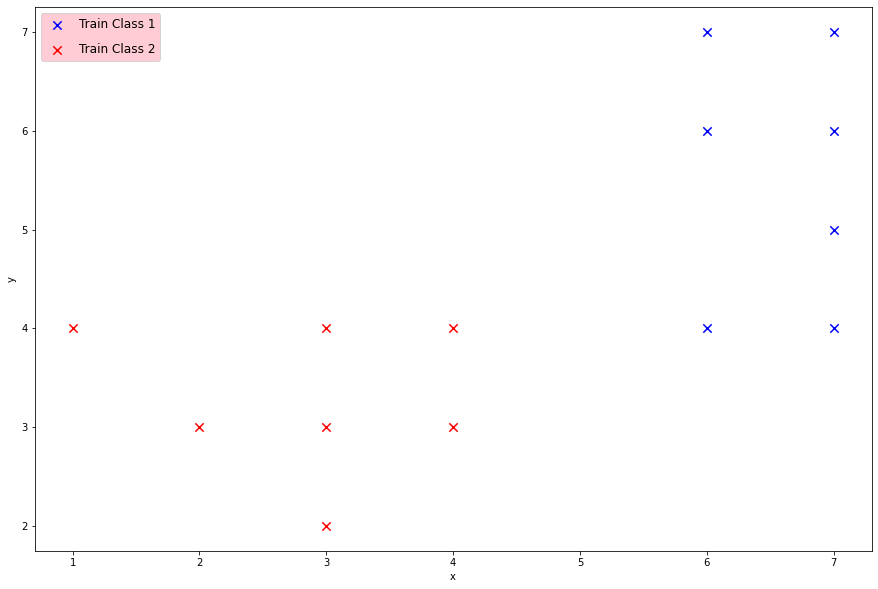

In [6]:
fig, axis = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
#scatting train values
axis.scatter(Trainclass1[:,0],Trainclass1[:,1],marker='x',color='blue',s=70,label='Train Class 1')
axis.scatter(Trainclass2[:,0],Trainclass2[:,1],marker='x',color='red',s=70,label='Train Class 2')
#labeling decoration 
legend = axis.legend(loc='upper left',fontsize='large',labelspacing=1.0)
legend.get_frame().set_facecolor('pink')
axis.set_xlabel('x')
axis.set_ylabel('y')

In [7]:
#part2

In [8]:
def euclidian_dist(p1, p2):
    sum = 0
    sum = math.pow(p1[0] - p2[0], 2) + math.pow(p1[1] - p2[1], 2)
    return round(math.sqrt(sum),2)

In [9]:
def knn_eu(x,train_set, new_sample, K):
    dists = {}
    
    for i in range(len(x)):
      d = euclidian_dist(x[i], new_sample)
      dists[i] = d
    
    k_neighbors = sorted(dists, key=dists.get)[:K]
    
    qty_label1 = 0 
    qty_label2 = 0
    for index in k_neighbors:
        if train_set[index][-1] == 1:
            qty_label1 += 1
        else:
            qty_label2 += 1
            
    if qty_label1 > qty_label2:
        return 1
    else:
        return 2

In [10]:
def manhattan_dist(p1,p2):
    sum = 0
    sum = abs(p1[0]-p2[0]) +  abs(p1[1]-p2[1])
    return sum

In [11]:
def knn_man(x,train_set, new_sample, K):
    dists = {}
    
    for i in range(len(x)):
      d = manhattan_dist(x[i], new_sample)
      dists[i] = d
    
    k_neighbors = sorted(dists, key=dists.get)[:K]
    
    qty_label1 = 0 
    qty_label2 = 0
    for index in k_neighbors:
        if train_set[index][-1] == 1:
            qty_label1 += 1
        else:
            qty_label2 += 1
            
    if qty_label1 > qty_label2:
        return 1
    else:
        return 2

In [12]:
def minkowski_dist(p1,p2):
    sum = 0
    p=1.5
    pp = 1/p
    sum = math.pow((abs(p1[0]-p2[0])),p) +  math.pow((abs(p1[1]-p2[1])),p)
    return round(sum**pp,2)

In [13]:
def knn_min(x,train_set, new_sample, K):
    dists = {}
    
    for i in range(len(x)):
      d = minkowski_dist(x[i], new_sample)
      dists[i] = d
    
    k_neighbors = sorted(dists, key=dists.get)[:K]
    
    qty_label1 = 0 
    qty_label2 = 0
    for index in k_neighbors:
        if train_set[index][-1] == 1:
            qty_label1 += 1
        else:
            qty_label2 += 1
            
    if qty_label1 > qty_label2:
        return 1
    else:
        return 2

In [84]:
K = int(input("Enter your value of k: ") )
l = []
for j in range(len(test)):
    label = knn_eu(x,train, test[j], K)
    l.append(label)
l

Enter your value of k: 9


[2, 1, 2, 2, 2, 2, 1, 1, 1]

In [87]:
K = int(input("Enter your value of k: ") )
l = []
for j in range(len(test)):
    label = knn_man(x,train, test[j], K)
    l.append(label)
l

Enter your value of k: 5


[1, 1, 2, 2, 2, 2, 1, 1, 1]

In [93]:
K = int(input("Enter your value of k: ") )
l = []
for j in range(len(test)):
    label = knn_min(x,train, test[j], K)
    l.append(label)
l

Enter your value of k: 7


[2, 1, 2, 2, 2, 2, 1, 1, 1]

In [94]:
test_label = np.array(l)
print(test_label)

[2 1 2 2 2 2 1 1 1]


In [95]:
y=np.zeros([9,3])
y[:,0]=test[:,0]
y[:,1]=test[:,1]
y[:,2]=test_label

In [96]:
y

array([[3., 7., 2.],
       [7., 7., 1.],
       [4., 3., 2.],
       [2., 8., 2.],
       [3., 5., 2.],
       [1., 2., 2.],
       [4., 8., 1.],
       [8., 3., 1.],
       [8., 4., 1.]])

In [97]:
test1 =[([i[0],i[1]]) for i in y if i[2] == 1]
test2 =[([i[0],i[1]]) for i in y if i[2] == 2]
test1 = np.array(test1)
test2 = np.array(test2)

Text(0, 0.5, 'y')

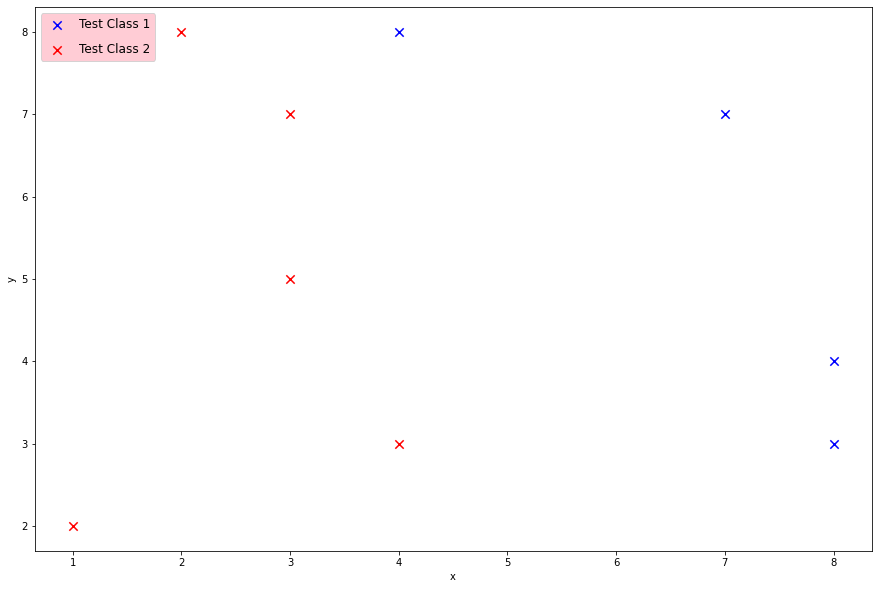

In [98]:
fig, axis = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
#scatting train values
axis.scatter(test1[:,0],test1[:,1],marker='x',color='blue',s=70,label='Test Class 1')
axis.scatter(test2[:,0],test2[:,1],marker='x',color='red',s=70,label='Test Class 2')
#labeling decoration 
legend = axis.legend(loc='upper left',fontsize='large',labelspacing=1.0)
legend.get_frame().set_facecolor('pink')
axis.set_xlabel('x')
axis.set_ylabel('y')

In [22]:
#part3

In [23]:
def knn_eu1(x,train_set, new_sample, K):
    dists = {}
    dx = []
    dx1 = []
    
    qty_label1 = 0 
    qty_label2 = 0 
    
    for i in range(len(x)):
      d = euclidian_dist(x[i], new_sample)
      dists[i] = d
      dx.append(d)
      #print(dx)
    dx.sort()
    k_neighbors = sorted(dists, key=dists.get)[:K]
    
    for i in range(K):
        dx1.append(dx[i])
    
    for index in range(len(k_neighbors)):
        #print(index,':',dx1[index])
        
        if train_set[k_neighbors[index]][-1] == 1:
            f1.write("%s %s %s %s %s %s \n" %("distance",index+1,":",dx1[index],"class","1"))
            print('distance ',index+1,':',dx1[index],'class',1)
            qty_label1 += 1
        else:
            f1.write("%s %s %s %s %s %s \n" %("distance",index+1,":",dx1[index],"class","2"))
            
            print('distance ',index+1,':',dx1[index],'class',2)
            qty_label2 += 1
            
    if qty_label1 > qty_label2:
        
        print('predicted  class 1')
        f1.write("%s\n" %("predicted  class 1"))
        
    elif qty_label1 < qty_label2:
        f1.write("%s\n" %("predicted  class 2"))
        print('predicted  class 2')
        
    else:
        f1.write("%s\n" %("can not predict into any class"))
        print('can not predict into any class')
    

In [24]:
def knn_man1(x,train_set, new_sample, K):
    dists = {}
    dx = []
    dx1 = []
    
    qty_label1 = 0 
    qty_label2 = 0 
    
    for i in range(len(x)):
      d = manhattan_dist(x[i], new_sample)
      dists[i] = d
      dx.append(d)
      #print(dx)
    dx.sort()
    k_neighbors = sorted(dists, key=dists.get)[:K]
    
    for i in range(K):
        dx1.append(dx[i])
    
    for index in range(len(k_neighbors)):
        #print(index,':',dx1[index])
        
        if train_set[k_neighbors[index]][-1] == 1:
            print('distance ',index+1,':',dx1[index],'class',1)
            f2.write("%s %s %s %s %s %s \n" %("distance",index+1,":",dx1[index],"class","1"))
            qty_label1 += 1
        else:
            print('distance ',index+1,':',dx1[index],'class',2)
            f2.write("%s %s %s %s %s %s \n" %("distance",index+1,":",dx1[index],"class","2"))
            qty_label2 += 1
            
    if qty_label1 > qty_label2:
        print('predicted  class 1')
        f2.write("%s\n" %("predicted  class 1"))
        
    elif qty_label1 < qty_label2:
        print('predicted  class 2')
        f2.write("%s\n" %("predicted  class 2"))
        
    else:
        print('can not predict into any class')
        f2.write("%s\n" %("can not predict into any class"))

In [25]:
def knn_min1(x,train_set, new_sample, K):
    dists = {}
    dx = []
    dx1 = []
    
    qty_label1 = 0 
    qty_label2 = 0 
    
    for i in range(len(x)):
      d = minkowski_dist(x[i], new_sample)
      dists[i] = d
      dx.append(d)
      #print(dx)
    dx.sort()
    k_neighbors = sorted(dists, key=dists.get)[:K]
    
    for i in range(K):
        dx1.append(dx[i])
    
    for index in range(len(k_neighbors)):
        #print(index,':',dx1[index])
        
        if train_set[k_neighbors[index]][-1] == 1:
            print('distance ',index+1,':',dx1[index],'class',1)
            f3.write("%s %s %s %s %s %s \n" %("distance",index+1,":",dx1[index],"class","1"))
            qty_label1 += 1
        else:
            print('distance ',index+1,':',dx1[index],'class',2)
            f3.write("%s %s %s %s %s %s \n" %("distance",index+1,":",dx1[index],"class","2"))
            qty_label2 += 1
            
    if qty_label1 > qty_label2:
        print('predicted  class 1')
        f3.write("%s\n" %("predicted  class 1"))
        
    elif qty_label1 < qty_label2:
        print('predicted  class 2')
        f3.write("%s\n" %("predicted  class 2"))
        
    else:
        print('can not predict into any class')
        f3.write("%s\n" %("can not predict into any class"))

In [44]:
f1 = open("predict_eu.txt", "a")


In [45]:
K = int(input("Enter your value of k: "))
f1.write("%s %s\n" %("K =",K))
print("k =",K)
for j in range(len(test)):
    
    f1.write("%s %s\n" %("test point",test[j]))
    print('test point',test[j])
    knn_eu1(x,train, test[j], K)
    f1.write('\n')
    print('\n')
f1.close()

Enter your value of k: 9
k = 9
test point [3 7]
distance  1 : 3.0 class 1
distance  2 : 3.0 class 2
distance  3 : 3.16 class 1
distance  4 : 3.16 class 2
distance  5 : 3.61 class 2
distance  6 : 4.0 class 1
distance  7 : 4.0 class 2
distance  8 : 4.12 class 1
distance  9 : 4.12 class 2
predicted  class 2


test point [7 7]
distance  1 : 0.0 class 1
distance  2 : 1.0 class 1
distance  3 : 1.0 class 1
distance  4 : 1.41 class 1
distance  5 : 2.0 class 1
distance  6 : 3.0 class 1
distance  7 : 3.16 class 1
distance  8 : 4.24 class 2
distance  9 : 5.0 class 2
predicted  class 1


test point [4 3]
distance  1 : 0.0 class 2
distance  2 : 1.0 class 2
distance  3 : 1.0 class 2
distance  4 : 1.41 class 2
distance  5 : 1.41 class 2
distance  6 : 2.0 class 2
distance  7 : 2.24 class 1
distance  8 : 3.16 class 1
distance  9 : 3.16 class 2
predicted  class 2


test point [2 8]
distance  1 : 4.12 class 1
distance  2 : 4.12 class 2
distance  3 : 4.12 class 2
distance  4 : 4.47 class 1
distance  5 : 4

In [56]:
f2 = open("predict_man.txt", "a")

In [57]:
K = int(input("Enter your value of k: "))
f2.write("%s %s\n" %("K =",K))
print("k =",K)
for j in range(len(test)):
    f2.write("%s %s\n" %("test point",test[j]))
    print('test point',test[j])
    knn_man1(x,train, test[j], K)
    print('\n')
    f2.write('\n')
f2.close()

Enter your value of k: 9
k = 9
test point [3 7]
distance  1 : 3 class 1
distance  2 : 3 class 2
distance  3 : 4 class 1
distance  4 : 4 class 1
distance  5 : 4 class 2
distance  6 : 4 class 2
distance  7 : 5 class 1
distance  8 : 5 class 2
distance  9 : 5 class 2
predicted  class 2


test point [7 7]
distance  1 : 0 class 1
distance  2 : 1 class 1
distance  3 : 1 class 1
distance  4 : 2 class 1
distance  5 : 2 class 1
distance  6 : 3 class 1
distance  7 : 4 class 1
distance  8 : 6 class 2
distance  9 : 7 class 2
predicted  class 1


test point [4 3]
distance  1 : 0 class 2
distance  2 : 1 class 2
distance  3 : 1 class 2
distance  4 : 2 class 2
distance  5 : 2 class 2
distance  6 : 2 class 2
distance  7 : 3 class 1
distance  8 : 4 class 1
distance  9 : 4 class 2
predicted  class 2


test point [2 8]
distance  1 : 5 class 1
distance  2 : 5 class 2
distance  3 : 5 class 2
distance  4 : 5 class 2
distance  5 : 6 class 1
distance  6 : 6 class 1
distance  7 : 6 class 2
distance  8 : 6 class 

In [54]:
f3 = open("predict_min.txt", "a")

In [55]:
K = int(input("Enter your value of k: "))
f3.write("%s %s\n" %("K =",K))
print("k =",K)
for j in range(len(test)):
    f3.write("%s %s\n" %("test point",test[j]))
    print('test point',test[j])
    knn_min1(x,train, test[j], K)
    print('\n')
    f3.write('\n')
f3.close()

Enter your value of k: 9
k = 9
test point [3 7]
distance  1 : 3.0 class 1
distance  2 : 3.0 class 2
distance  3 : 3.37 class 1
distance  4 : 3.37 class 2
distance  5 : 4.0 class 1
distance  6 : 4.0 class 2
distance  7 : 4.01 class 2
distance  8 : 4.33 class 1
distance  9 : 4.33 class 2
predicted  class 2


test point [7 7]
distance  1 : 0.0 class 1
distance  2 : 1.0 class 1
distance  3 : 1.0 class 1
distance  4 : 1.59 class 1
distance  5 : 2.0 class 1
distance  6 : 3.0 class 1
distance  7 : 3.37 class 1
distance  8 : 4.76 class 2
distance  9 : 5.58 class 2
predicted  class 1


test point [4 3]
distance  1 : 0.0 class 2
distance  2 : 1.0 class 2
distance  3 : 1.0 class 2
distance  4 : 1.59 class 2
distance  5 : 1.59 class 2
distance  6 : 2.0 class 2
distance  7 : 2.45 class 1
distance  8 : 3.37 class 1
distance  9 : 3.37 class 2
predicted  class 2


test point [2 8]
distance  1 : 4.33 class 1
distance  2 : 4.33 class 2
distance  3 : 4.33 class 2
distance  4 : 4.89 class 1
distance  5 : 